In [247]:
##FUNCIONES AUXILIARES

In [248]:
def ngramas(texto, n):
    """Divide el texto en ngramas"""
    texto = texto.replace(" ","")
    return [texto[i:i+n] for i in range(len(texto)-n+1)]

In [249]:
from collections import Counter
import pandas as pd
def frec_ngramas(texto, n):
    """Calcula las frecuencias de los ngramas de un texto"""
    ng = ngramas(texto, n)
    frecuencias = Counter(ng)
    return pd.DataFrame(frecuencias.most_common(), columns = ['letra','frecuencia'])

In [250]:
def leer_frecuencias(archivo):
    """Lee un fichero con las frecuencias de los ngramas para esp"""
    return pd.read_csv(archivo, sep=" ",names=["letra", "frecuencia"])

In [251]:
def leer_texto_cifrado(texto_cifrado, n):
    """Lee el texto cifrado y calcula las frecuencias de los ngramas"""
    with open(texto_cifrado) as f:
        texto_cifrado = f.readlines()[0]
        return frec_ngramas(texto_cifrado, n)

In [252]:
##ANALISIS DE MONOGRAMAS(LETRAS)

In [253]:
monogramas_es = leer_frecuencias("/Users/User/Documents/Phyton/Curso_Linux/spanish_monograms (1).txt")



In [254]:
monogramas_es.head(10)

,letra,frecuencia
0,E,10912000
1,A,10301872
2,O,7398419
3,S,6128524
4,N,5838540
5,I,5694616
6,R,5450913
7,L,4808679
8,D,4237020
9,C,3648080


<Axes: xlabel='letra'>

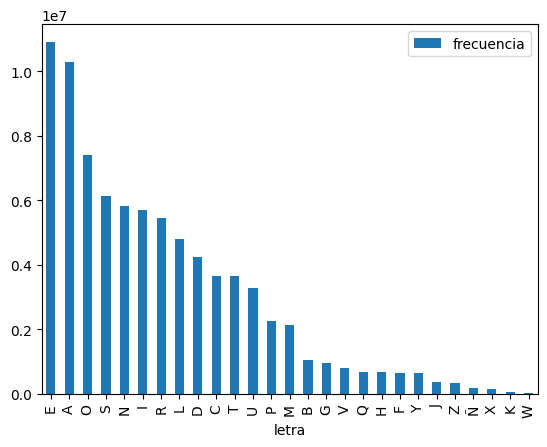

In [255]:
monogramas_es.plot('letra', 'frecuencia', kind = 'bar')

In [256]:
monogramas_cifrado = leer_texto_cifrado('/Users/User/Documents/Phyton/Curso_Linux/texto_cifrado.txt',1)

In [257]:
monogramas_cifrado.head(10)

,letra,frecuencia
0,H,2609
1,L,2343
2,X,1710
3,V,1502
4,G,1261
5,F,1242
6,U,1195
7,T,1188
8,K,980
9,A,758


In [258]:
import string

{letra:None for letra in string.ascii_lowercase}

{'a': None,
 'b': None,
 'c': None,
 'd': None,
 'e': None,
 'f': None,
 'g': None,
 'h': None,
 'i': None,
 'j': None,
 'k': None,
 'l': None,
 'm': None,
 'n': None,
 'o': None,
 'p': None,
 'q': None,
 'r': None,
 's': None,
 't': None,
 'u': None,
 'v': None,
 'w': None,
 'x': None,
 'y': None,
 'z': None}

ANALISIS BIGRAMAS

In [259]:
bigramas_es = leer_frecuencias('/Users/User/Documents/Phyton/Curso_Linux/spanish_bigrams.txt')
bigramas_es.head(10)

,letra,frecuencia
0,DE,2088635
1,ES,1882962
2,EN,1850294
3,EL,1638128
4,LA,1464005
5,OS,1460757
6,ON,1307790
7,AS,1268034
8,ER,1239281
9,RA,1197125


In [260]:
bigramas_cifrado = leer_texto_cifrado('/Users/User/Documents/Phyton/Curso_Linux/texto_cifrado.txt',2)
bigramas_cifrado.head(10)

,letra,frecuencia
0,KL,471
1,HV,437
2,XV,388
3,LF,385
4,LU,378
5,UH,372
6,LV,348
7,LG,310
8,HF,282
9,HK,279


TRIGRAMAS

In [262]:
trigramas_es = leer_frecuencias('/Users/User/Documents/Phyton/Curso_Linux/spanish_trigrams.txt')
trigramas_es.head(10)

,letra,frecuencia
0,DEL,601928
1,QUE,594436
2,ENT,538864
3,ION,450424
4,ELA,439787
5,CON,431589
6,SDE,417925
7,ADE,408906
8,CIO,398883
9,NTE,394852


In [263]:
trigramas_cifrado = leer_texto_cifrado('/Users/User/Documents/Phyton/Curso_Linux/texto_cifrado.txt',3)
trigramas_cifrado.head(10)

,letra,frecuencia
0,BAL,160
1,KLU,159
2,VKL,117
3,HJH,115
4,UXV,111
5,LUH,107
6,UHV,99
7,HKL,97
8,LFC,96
9,XKL,94


CUATRIGRAMAS


In [264]:
cuatrigramas_es = leer_frecuencias('/Users/User/Documents/Phyton/Curso_Linux/spanish_quadgrams.txt')
cuatrigramas_es.head(10)

,letra,frecuencia
0,CION,336012
1,DELA,262918
2,ACIO,216501
3,ENTE,195858
4,ESTA,174928
5,ESDE,174010
6,PARA,148049
7,ONES,136017
8,SDEL,133576
9,OSDE,132251


In [265]:
cuatrigramas_cifrado = leer_texto_cifrado('/Users/User/Documents/Phyton/Curso_Linux/texto_cifrado.txt',4)
cuatrigramas_cifrado.head(10)

,letra,frecuencia
0,KLUH,81
1,VKLU,51
2,HBAL,48
3,HVKL,39
4,XVKL,38
5,LVKL,37
6,HKLU,36
7,HJHF,35
8,VBAL,34
9,BALU,33


In [306]:
alfabeto_permutado = {
    'a': 'u',
     'b': 'q',
     'c': 't',
     'd': 'f',
     'e': 'v',
     'f': 'n',
     'g': 'r',
     'h': 'a',
     'i': 'x',
     'j': 'b',
     'k': 'd',
     'l': 'e',
     'm': 'y',
     'n': 'j',
     'o': 'p',
     'p': 'c',
     'q': 'h',
     'r': 's',
     's': None,
     't': 'i',
     'u': 'l',
     'v': 's',
     'w': 'g',
     'x': 'o',
     'y': None,
     'z': 'm'
}

DESCIFRADO

In [307]:
def alg_descifrado(texto_cifrado, alfabeto_permutado):
    "Descifrando a partir del alfabeto sustituido con el analisis"
    texto_plano = ""
    with open(texto_cifrado) as f:
        texto_cifrado = f.readlines()[0]
    for letra in texto_cifrado:
        if not alfabeto_permutado[letra.lower()]:
            texto_plano += letra
        else:
            texto_plano += alfabeto_permutado[letra.lower()]
    return texto_plano

In [308]:
alg_descifrado('/Users/User/Documents/Phyton/Curso_Linux/texto_cifrado.txt', alfabeto_permutado)


'alrededordelacatedralseextendiaenestrechasonaelprimitivorecintodevetustacomprendialoquesellamabaelbarriodelaencimadaydominabatodoelpuebloquesehabiaidoestirandopornoroesteyporsudestedesdelatorreseveiaenalgunospatiosyjardinesdecasasviejasyruinosasrestosdelaantiguamurallaconvertidosenterradosoparedesmedianerasentrehuertosycorraleslaencimadaeraelbarrionobleyelbarriopobredevetustalosmaslinajudosylosmasandrajososvivianallicercaunosdeotrosaquellosasusanchaslosotrosapinadoselbuenvetustenteeradelaencimadaalgunosfatuosestimabanenmucholapropiedaddeunacasapormiserablequefueraenlapartealtadelaciudadalasombradelacatedralodesantamarialamayorodesanpedrolasdosantiquisimasiglesiasvecinasdelabasilicayparroquiasquesedividianelnobleterritoriodelaencimadaelmagistralveiaasuspieselbarriolinajudocompuestodecaseronesconinfulasdepalaciosconventosgrandescomopueblosytuguriosdondeseamontonabalaplebevetustensedemasiadopobreparapoderhabitarlasbarriadasnuevasallaabajoenelcampodelsolalsudestedondelafabricaviejalevanta